In [1]:
import sys
import os

# Add src to path
sys.path.append(os.path.join(os.getcwd(), '..', 'src'))

from data_processing.pdf_parser import DocumentParser
from data_processing.text_cleaner import TextCleaner
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("✓ Imports successful")

c:\Users\klmor\resume-screener-ats\notebooks\..\src\data_processing\text_cleaner.py:190: SyntaxWarning: invalid escape sequence '\s'
  section_text = re.sub(f'^{re.escape(keyword)}[:\s]*', '', section_text, flags=re.IGNORECASE)


✓ Imports successful


In [2]:
# Initialize parser
parser = DocumentParser()
cleaner = TextCleaner()

# Parse resumes
resume_dir = '../data/sample/resumes'
resumes = parser.parse_directory(resume_dir)

# Parse job descriptions
jd_dir = '../data/sample/job_descriptions'
job_descriptions = parser.parse_directory(jd_dir)

print(f"Loaded {len(resumes)} resumes")
print(f"Loaded {len(job_descriptions)} job descriptions")

✓ Parsed: John_Doe_Resume.txt (337 words)
✓ Parsed: Michael_Chen_Resume.txt (300 words)
✓ Parsed: Sarah_Johnson_Resume.txt (391 words)
✓ Parsed: Data_Scientist.txt (106 words)
✓ Parsed: Frontend_Developer.txt (96 words)
✓ Parsed: Senior_Python_Developer.txt (103 words)
Loaded 3 resumes
Loaded 3 job descriptions


In [3]:
# Create DataFrame for analysis
resume_data = []

for resume in resumes:
    text = resume['text']
    contact = cleaner.extract_contact_info(text)
    name = cleaner.extract_name(text)
    years = cleaner.extract_years_of_experience(text)
    sections = cleaner.extract_sections(text)
    
    resume_data.append({
        'filename': resume['filename'],
        'name': name,
        'email': contact['email'],
        'word_count': resume['word_count'],
        'years_experience': years,
        'has_linkedin': contact['linkedin'] is not None,
        'has_github': contact['github'] is not None,
        'num_sections': len(sections)
    })

df_resumes = pd.DataFrame(resume_data)
display(df_resumes)

,filename,name,email,word_count,years_experience,has_linkedin,has_github,num_sections
0,John_Doe_Resume.txt,JOHN DOE,john.doe@email.com,337,6,True,True,6
1,Michael_Chen_Resume.txt,MICHAEL CHEN,michael.chen@email.com,300,5,False,True,5
2,Sarah_Johnson_Resume.txt,SARAH JOHNSON,sarah.j@email.com,391,7,False,True,7


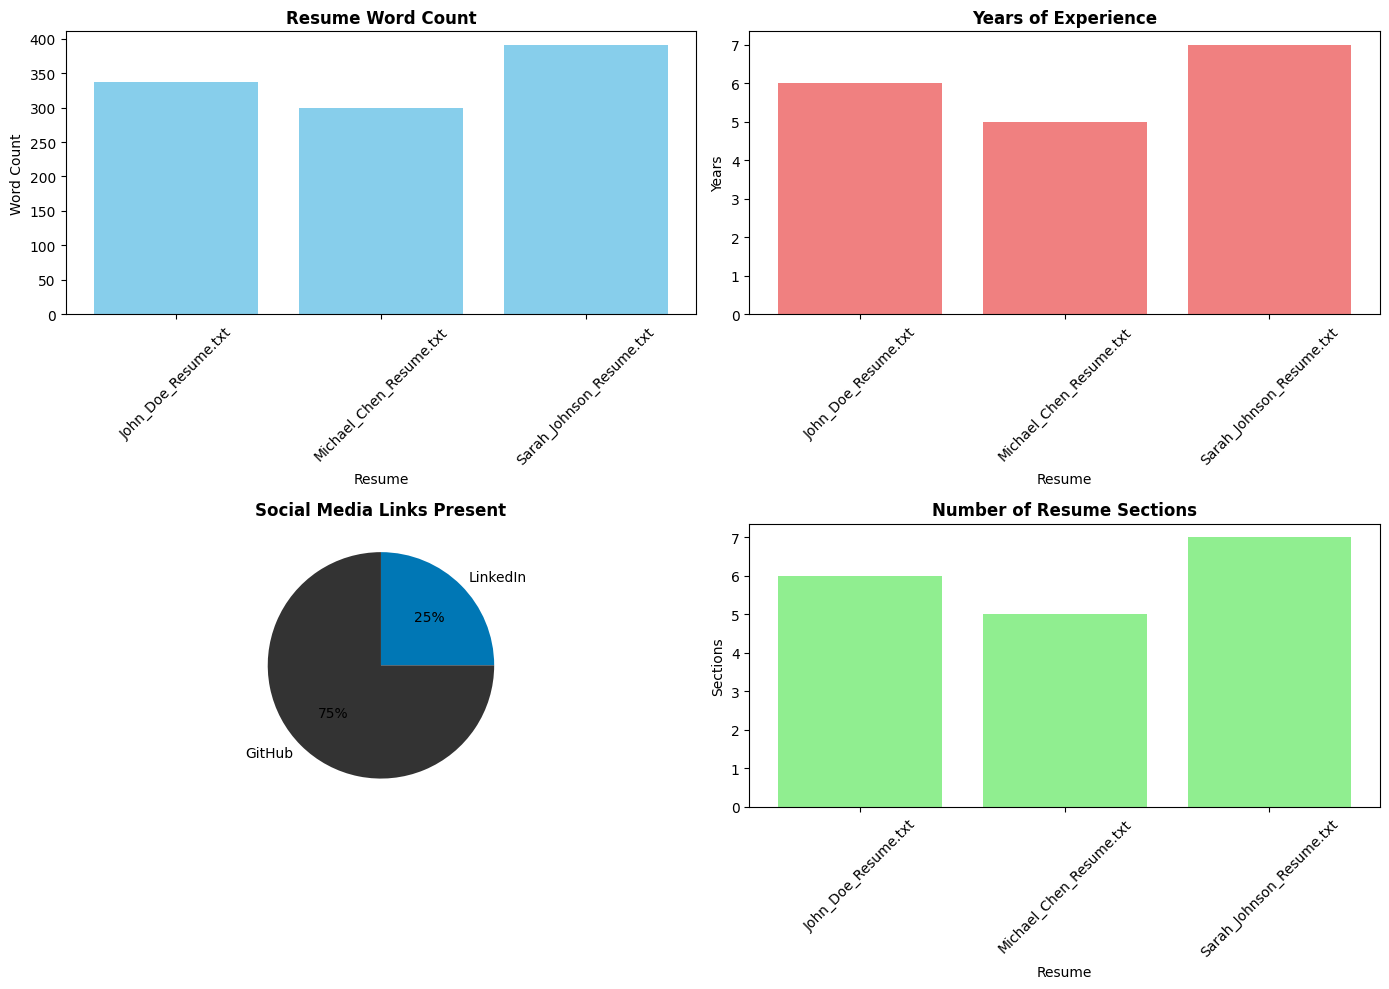

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Word count distribution
axes[0, 0].bar(df_resumes['filename'], df_resumes['word_count'], color='skyblue')
axes[0, 0].set_title('Resume Word Count', fontweight='bold')
axes[0, 0].set_xlabel('Resume')
axes[0, 0].set_ylabel('Word Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# Years of experience
axes[0, 1].bar(df_resumes['filename'], df_resumes['years_experience'], color='lightcoral')
axes[0, 1].set_title('Years of Experience', fontweight='bold')
axes[0, 1].set_xlabel('Resume')
axes[0, 1].set_ylabel('Years')
axes[0, 1].tick_params(axis='x', rotation=45)

# Social media presence
social_data = df_resumes[['has_linkedin', 'has_github']].sum()
axes[1, 0].pie(social_data.values, labels=['LinkedIn', 'GitHub'], autopct='%1.0f%%', colors=['#0077B5', '#333'])
axes[1, 0].set_title('Social Media Links Present', fontweight='bold')

# Section count
axes[1, 1].bar(df_resumes['filename'], df_resumes['num_sections'], color='lightgreen')
axes[1, 1].set_title('Number of Resume Sections', fontweight='bold')
axes[1, 1].set_xlabel('Resume')
axes[1, 1].set_ylabel('Sections')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [5]:
# Show sections from first resume
sample_resume = resumes[0]
sections = cleaner.extract_sections(sample_resume['text'])

print("="*70)
print(f"SECTIONS FROM: {sample_resume['filename']}")
print("="*70)

for section_name, section_text in sections.items():
    print(f"\n{section_name.upper()}")
    print("-"*70)
    # Show first 200 characters
    preview = section_text[:200] + "..." if len(section_text) > 200 else section_text
    print(preview)

SECTIONS FROM: John_Doe_Resume.txt

SUMMARY
----------------------------------------------------------------------


EXPERIENCE
----------------------------------------------------------------------
d software engineer with 6 years of expertise in Python development,
cloud infrastructure, and building scalable applications. Passionate about clean
code and mentoring junior developers.

SKILLS
----------------------------------------------------------------------
Programming Languages: Python, JavaScript, SQL, Bash
Frameworks & Libraries: Django, FastAPI, React, Flask
Databases: PostgreSQL, MongoDB, Redis, MySQL
Cloud & DevOps: AWS (EC2, S3, Lambda, RDS), Dock...

EDUCATION
----------------------------------------------------------------------
Bachelor of Science in Computer Science
University of Cape Town | 2014 - 2017
GPA: 3.7/4.0

CERTIFICATIONS
----------------------------------------------------------------------
- AWS Certified Solutions Architect - Associate (2022)
- Python Profes

In [6]:
jd_data = []

for jd in job_descriptions:
    text = jd['text']
    cleaner.clean_text(text)
    
    jd_data.append({
        'filename': jd['filename'],
        'word_count': jd['word_count'],
        'char_count': jd['char_count']
    })

df_jd = pd.DataFrame(jd_data)
print("Job Description Statistics:")
display(df_jd)

Job Description Statistics:


,filename,word_count,char_count
0,Data_Scientist.txt,106,733
1,Frontend_Developer.txt,96,663
2,Senior_Python_Developer.txt,103,687


In [7]:
print("="*70)
print("PHASE 2 SUMMARY")
print("="*70)

print(f"\n📄 RESUMES PROCESSED: {len(resumes)}")
print(f"  • Average word count: {df_resumes['word_count'].mean():.0f}")
print(f"  • Average years experience: {df_resumes['years_experience'].mean():.1f}")
print(f"  • Candidates with LinkedIn: {df_resumes['has_linkedin'].sum()}/{len(resumes)}")
print(f"  • Candidates with GitHub: {df_resumes['has_github'].sum()}/{len(resumes)}")

print(f"\n📋 JOB DESCRIPTIONS PROCESSED: {len(job_descriptions)}")
print(f"  • Average word count: {df_jd['word_count'].mean():.0f}")

print(f"\n✓ Text extraction working correctly")
print(f"✓ Contact information extraction working")
print(f"✓ Section parsing working")
print(f"✓ Ready for Phase 3: Skill Extraction")

PHASE 2 SUMMARY

📄 RESUMES PROCESSED: 3
  • Average word count: 343
  • Average years experience: 6.0
  • Candidates with LinkedIn: 1/3
  • Candidates with GitHub: 3/3

📋 JOB DESCRIPTIONS PROCESSED: 3
  • Average word count: 102

✓ Text extraction working correctly
✓ Contact information extraction working
✓ Section parsing working
✓ Ready for Phase 3: Skill Extraction
